# 移流方程式

$$
\frac{du}{dt}+c\frac{du}{dx}=0
$$

一般解は、以下で与えられる。

$$
u(x, t) = u_0(x-ct)
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from advection import advectionCentralFDM, advectionUpwindFDM, advectionSpectral, advectionSciPyCubicSpline, advectionNumPyGradient

In [2]:
def u_exact(fun, x, t, c=1.):
    return fun(x-c*t)

def stepFun(x):
    x = (x + np.pi) % (2 * np.pi) - np.pi
    return np.sign(x - np.pi/3) - np.sign(x - np.pi)

def sineFun(x):
    return np.sin(x) + np.sin(8*x)

In [3]:
c = 1.

nx = 64 # Number of Partision
lx = 2 * np.pi
dx = lx / nx
x = np.linspace(0, lx, nx, endpoint=False)

t0 = 0 # Initial time.
tf = np.abs(lx / c)
nt = nx * 5
dt = (tf - t0) / nt

CFL = np.abs(c * dt / dx)
print('CFL =', CFL)

# Central Difference Methods
solver_c2 = advectionCentralFDM(x=x, c=c, order=2)
solver_c4 = advectionCentralFDM(x=x, c=c, order=4)
solver_c6 = advectionCentralFDM(x=x, c=c, order=6)
# Upwind Difference Methods
solver_u1 = advectionUpwindFDM(x=x, c=c, order=1)
solver_u3 = advectionUpwindFDM(x=x, c=c, order=3)
solver_u5 = advectionUpwindFDM(x=x, c=c, order=5)
# Spectral Method
solver_sp = advectionSpectral(x=x, c=c)
# Cubic Spline Method of SciPy
solver_cs = advectionSciPyCubicSpline(x=x, c=c)
# 2nd order central differences of NumPy
solver_np = advectionNumPyGradient(x=x, c=c)

CFL = 0.2


In [4]:
def solve_and_plot(u_fun):
    u0 = u_fun(x) # Initial state.
    ue = u_exact(u_fun, x, t0+dt*nt, c=c)

    u_c2 = solver_c2.solve(u0, t0, dt, nt)
    u_c4 = solver_c4.solve(u0, t0, dt, nt)
    u_c6 = solver_c6.solve(u0, t0, dt, nt)
    u_u1 = solver_u1.solve(u0, t0, dt, nt)
    u_u3 = solver_u3.solve(u0, t0, dt, nt)
    u_u5 = solver_u5.solve(u0, t0, dt, nt)
    u_ps = solver_sp.solve(u0, t0, dt, nt)
    u_np = solver_np.solve(u0, t0, dt, nt)
    u_cs = solver_cs.solve(u0, t0, dt, nt)

    plt.figure(dpi=150)
    plt.plot(x, ue, label="Exact solution", linestyle="solid")
    plt.plot(x, u_np, label="np.gradient", linestyle="dashed")
    plt.plot(x, u_c2, label="2nd-order central", linestyle="dotted")
    plt.plot(x, u_c4, label="4th-order central", linestyle="dashed")
    plt.plot(x, u_c6, label="6th-order central", linestyle="dashdot")
    plt.plot(x, u_u1, label="1st-order upwind", linestyle="solid")
    plt.plot(x, u_u3, label="3rd-order upwind", linestyle="dashed")
    plt.plot(x, u_u5, label="5th-order upwind", linestyle="dashdot")
    plt.plot(x, u_cs, label="Cubic spline", linestyle="dotted")
    plt.plot(x, u_ps, label="Spectral", linestyle="dotted")
    plt.xlabel("$x$")
    plt.ylabel("$u$")
    plt.grid()
    plt.legend()
    plt.show()

In [5]:
def calcL1Loss(x, y):
    return np.linalg.norm(x-y, ord=1) / len(x)

In [6]:
def compare(u_fun):
    c = 1.
    lx = 2 * np.pi
    t0 = 0 # Initial time.
    tf = np.abs(lx / c)

    L1Loss_dx = []
    L1Loss_c2 = []
    L1Loss_c4 = []
    L1Loss_c6 = []
    L1Loss_u1 = []
    L1Loss_u3 = []
    L1Loss_u5 = []
    L1Loss_ps = []
    L1Loss_cs = []
    L1Loss_np = []

    nxs = 18 * 4**np.arange(6)
    for nx in nxs:
        nx = int(nx)
        dx = lx / nx
        x = np.linspace(0, lx, nx, endpoint=False)
        nt = max(nxs) * 5
        dt = (tf - t0) / nt
        ts = 3

        L1Loss_dx.append(dx)

        u0 = u_fun(x) # Initial state.
        ue = u_exact(u_fun, x, t0+dt*ts, c=c)

        solver_c2 = advectionCentralFDM(x=x, c=c, order=2)
        solver_c4 = advectionCentralFDM(x=x, c=c, order=4)
        solver_c6 = advectionCentralFDM(x=x, c=c, order=6)
        solver_u1 = advectionUpwindFDM(x=x, c=c, order=1)
        solver_u3 = advectionUpwindFDM(x=x, c=c, order=3)
        solver_u5 = advectionUpwindFDM(x=x, c=c, order=5)
        solver_sp = advectionSpectral(x=x, c=c)
        solver_cs = advectionSciPyCubicSpline(x=x, c=c)
        solver_np = advectionNumPyGradient(x=x, c=c)

        u_c2 = solver_c2.solve(u0, t0, dt, ts)
        u_c4 = solver_c4.solve(u0, t0, dt, ts)
        u_c6 = solver_c6.solve(u0, t0, dt, ts)
        u_u1 = solver_u1.solve(u0, t0, dt, ts)
        u_u3 = solver_u3.solve(u0, t0, dt, ts)
        u_u5 = solver_u5.solve(u0, t0, dt, ts)
        u_ps = solver_sp.solve(u0, t0, dt, ts)
        u_np = solver_np.solve(u0, t0, dt, ts)
        u_cs = solver_cs.solve(u0, t0, dt, ts)

        L1Loss_c2.append(calcL1Loss(u_c2, ue))
        L1Loss_c4.append(calcL1Loss(u_c4, ue))
        L1Loss_c6.append(calcL1Loss(u_c6, ue))
        L1Loss_u1.append(calcL1Loss(u_u1, ue))
        L1Loss_u3.append(calcL1Loss(u_u3, ue))
        L1Loss_u5.append(calcL1Loss(u_u5, ue))
        L1Loss_ps.append(calcL1Loss(u_ps, ue))
        L1Loss_cs.append(calcL1Loss(u_cs, ue))
        L1Loss_np.append(calcL1Loss(u_np, ue))

    plt.figure(dpi=150)
    plt.plot(L1Loss_dx, L1Loss_np, '--o', label="np.gradient")
    plt.plot(L1Loss_dx, L1Loss_c2, '--o', label="2nd-order central")
    plt.plot(L1Loss_dx, L1Loss_c4, '--o', label="4th-order central")
    plt.plot(L1Loss_dx, L1Loss_c6, '--o', label="6th-order central")
    plt.plot(L1Loss_dx, L1Loss_u1, '--o', label="1st-order upwind")
    plt.plot(L1Loss_dx, L1Loss_u3, '--o', label="3rd-order upwind")
    plt.plot(L1Loss_dx, L1Loss_u5, '--o', label="5th-order upwind")
    plt.plot(L1Loss_dx, L1Loss_cs, '--o', label="Cubic spline")
    plt.plot(L1Loss_dx, L1Loss_ps, '--o', label="Spectral")
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('$\Delta x$')
    plt.ylabel('L1 Loss')
    plt.grid()
    plt.grid(which='minor')
    plt.legend()
    plt.show()

## 正弦波

$$
u_0 = \sin x + \sin 8x \\
$$

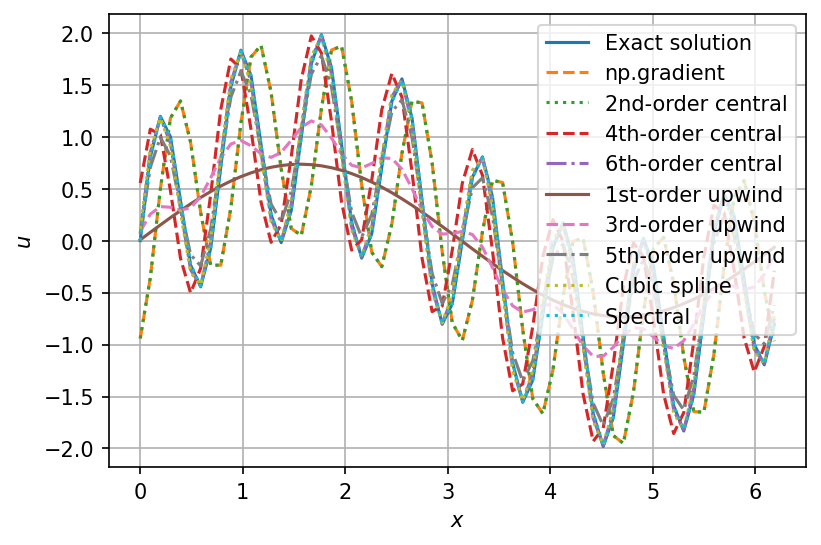

In [7]:
solve_and_plot(u_fun=sineFun)

## ステップ関数

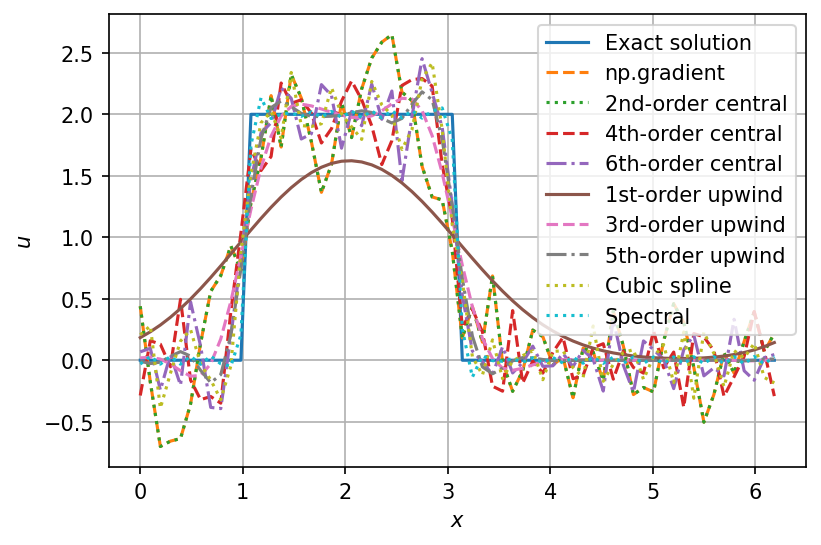

In [8]:
solve_and_plot(u_fun=stepFun)

## 誤差の比較

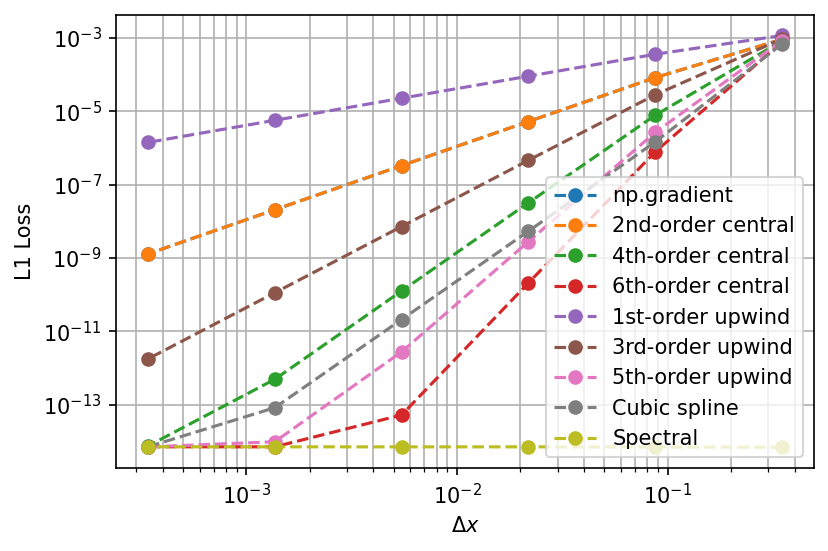

In [9]:
compare(sineFun)